In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lets load the Boston House Pricing Dataset

In [7]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [8]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

# Preparing the dataset

In [9]:
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [10]:
dataset['Progression'] = diabetes.target

In [11]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [13]:
dataset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [14]:
# Check null values
dataset.isnull().any()

age            False
sex            False
bmi            False
bp             False
s1             False
s2             False
s3             False
s4             False
s5             False
s6             False
Progression    False
dtype: bool

In [15]:
# Exploratory Data Analysis
# Correlation Matrix

dataset.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


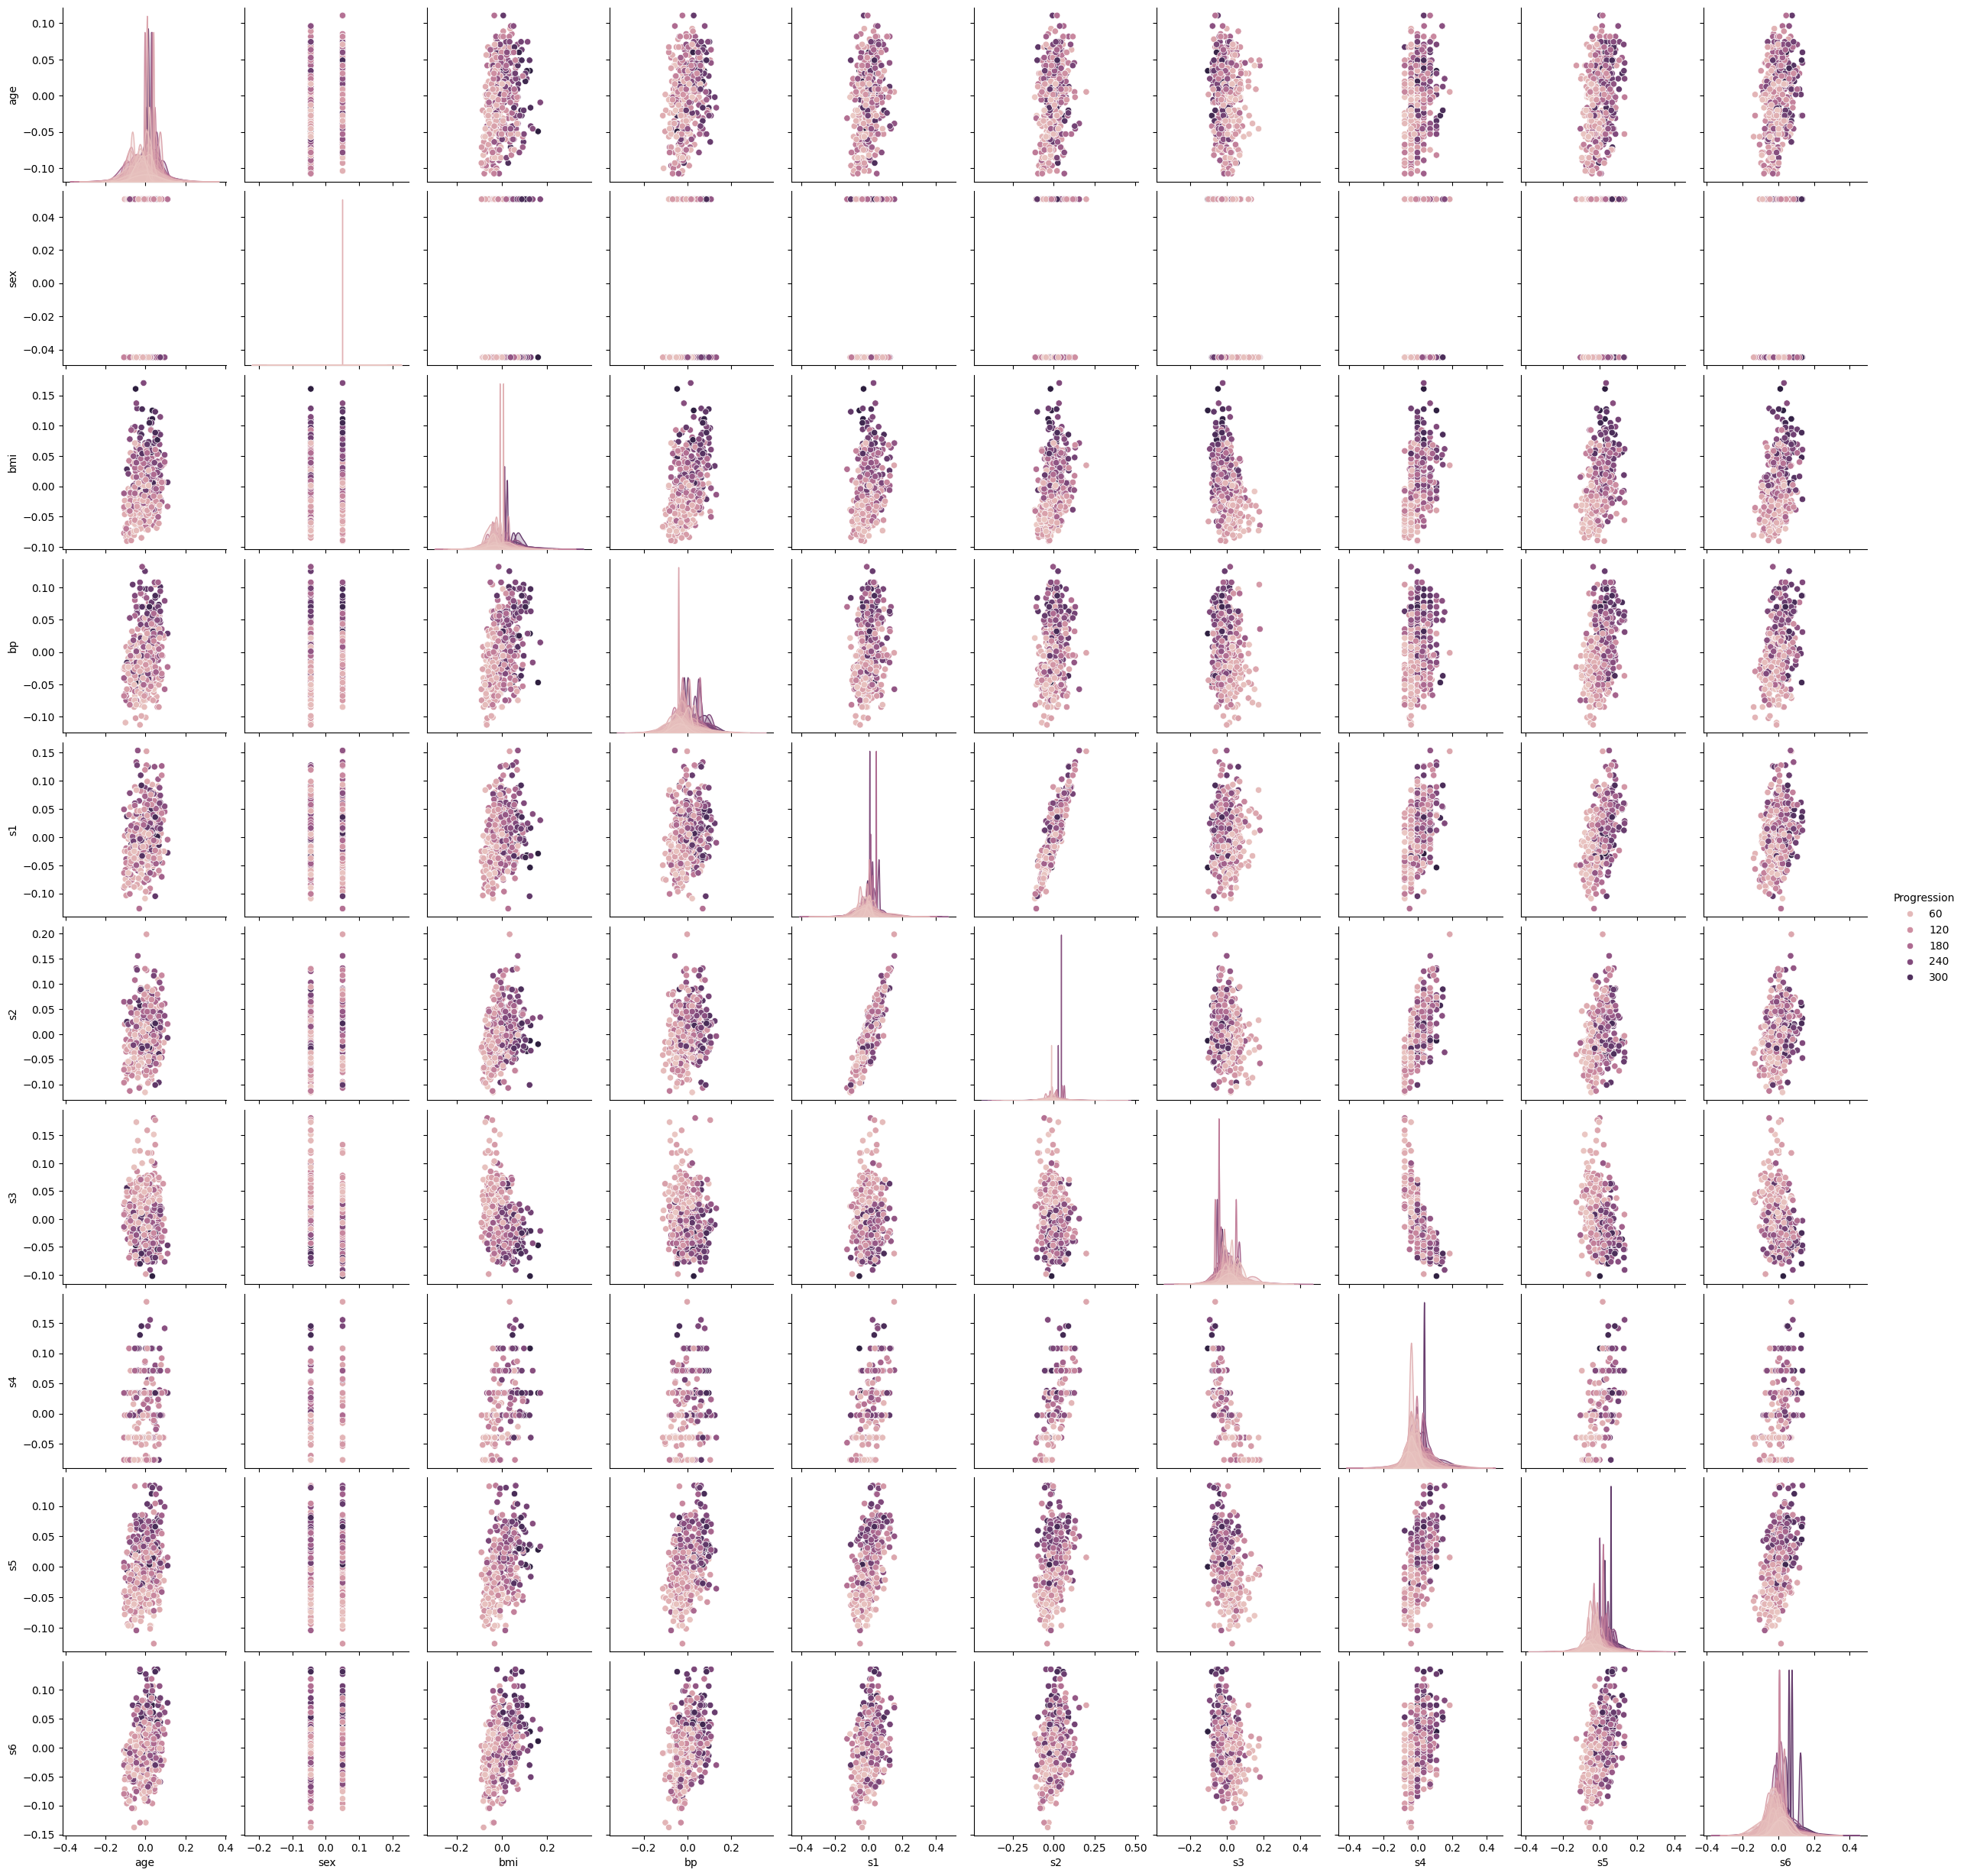

In [16]:
# Visualizing the correlation matrix using matplotlib

import seaborn as sns
sns.pairplot(dataset, hue='Progression')

<Axes: xlabel='bmi', ylabel='Progression'>

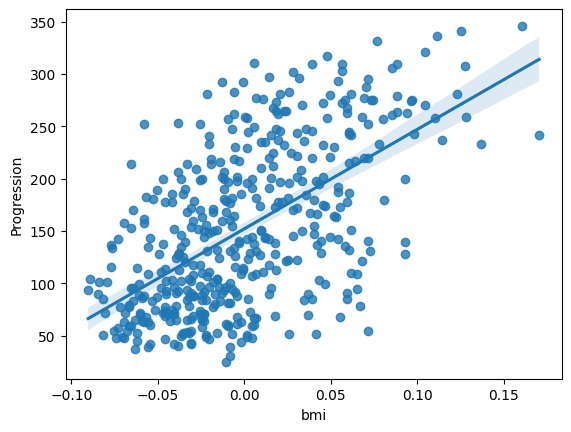

In [17]:
sns.regplot(x="bmi", y="Progression", data=dataset)

In [18]:
# Independent and dependent variables

X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [19]:
X, y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019907 

In [20]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096435,-0.034215
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067
99,-0.001882,-0.044642,-0.064408,0.011544,0.027326,0.037517,-0.013948,0.034309,0.011785,-0.054925
115,-0.030942,0.050680,0.001339,-0.005670,0.064477,0.049416,-0.047082,0.108111,0.083799,0.003064
146,-0.030942,0.050680,0.059541,0.001215,0.012191,0.031567,-0.043401,0.034309,0.014821,0.007207
...,...,...,...,...,...,...,...,...,...,...
282,0.070769,-0.044642,-0.005128,-0.005670,0.087868,0.102965,0.011824,0.034309,-0.008943,0.027917
144,0.030811,0.050680,0.046607,-0.015999,0.020446,0.050669,-0.058127,0.071210,0.006207,0.007207
27,-0.023677,-0.044642,0.059541,-0.040099,-0.042848,-0.043589,0.011824,-0.039493,-0.015999,0.040343
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920


In [22]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [23]:
sc.fit_transform(X_train)

array([[-1.4865548 ,  1.07860961, -1.52762666, ..., -0.05514135,
        -1.94442123, -0.72269851],
       [ 1.40472188, -0.9271195 , -1.23508649, ..., -0.8050094 ,
        -1.12911889, -1.25310474],
       [-0.04091646, -0.9271195 , -1.30259576, ...,  0.69472669,
         0.24595427, -1.1647037 ],
       ...,
       [-0.49743383, -0.9271195 ,  1.28525954, ..., -0.8050094 ,
        -0.31639955,  0.86852017],
       [-2.0191584 , -0.9271195 , -1.55012974, ..., -0.8050094 ,
        -1.19627663, -1.78351097],
       [ 1.25254942,  1.07860961,  1.64530898, ...,  0.69472669,
         0.61329234,  0.9569212 ]])

In [24]:
sc.transform(X_test)

array([[-0.57352006, -0.9271195 , -0.33496291, ..., -0.8050094 ,
        -0.1735971 , -1.1647037 ],
       [ 0.56777337, -0.9271195 ,  1.98285532, ...,  0.42477419,
        -0.97137201,  0.42651498],
       [ 0.18734222, -0.9271195 ,  0.38513596, ...,  0.69472669,
         0.79613113,  2.54813988],
       ...,
       [-1.33438234, -0.9271195 ,  0.79019157, ..., -0.05514135,
        -0.51787277, -1.1647037 ],
       [ 0.94820451, -0.9271195 ,  1.53279353, ..., -0.8050094 ,
        -0.82598657, -1.51830785],
       [ 1.32863565,  1.07860961,  1.89284296, ...,  1.44459473,
         0.60037739,  1.57572847]])

# Model Training

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# print the coefficients and intercept 

print(regressor.coef_, regressor.intercept_)

[ -53.72235169 -256.20645705  582.30324997  325.12978763 -591.25651468
  330.38061531   52.10924627  181.92457975  695.36090132   16.93841746] 154.30519416213247


In [29]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [30]:
reg_pred = regressor.predict(X_test)

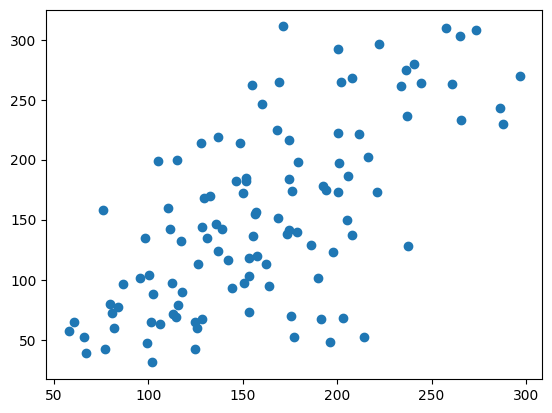

In [31]:
# plot a scatter plot for the prediction

plt.scatter(reg_pred, y_test)

In [32]:
# Residuals / errors
residuals = y_test - reg_pred

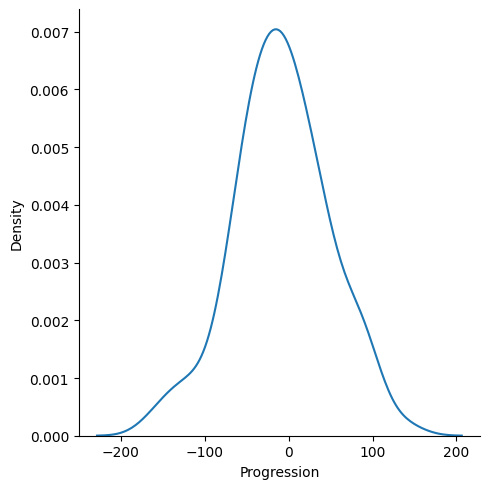

In [33]:
sns.displot(residuals, kind='kde')

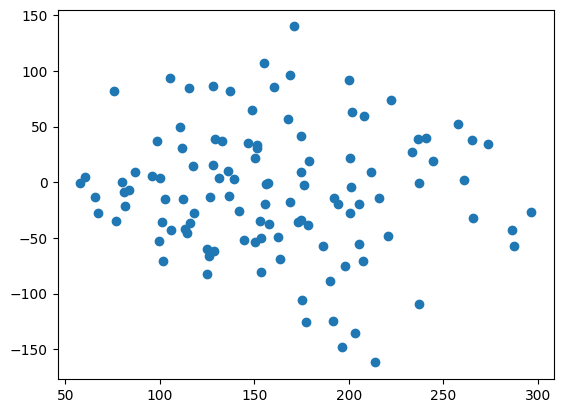

In [34]:
# Scatter plot with respect to prediction and residuals
# uniform distribution

plt.scatter(reg_pred, residuals)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

44.75360095407294
3273.311042393123
57.212857317154885


In [36]:
# R Square and adjusted R Square

from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.4275436399139496


In [37]:
adjusted_r_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r_score)

0.3702980039053445


In [38]:
diabetes.data[0].reshape(1, -1)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]])

In [39]:
regressor.predict(sc.transform(diabetes.data[0].reshape(1, -1)))

/Users/zeronp/Downloads/ml-deployment/diabetes-prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/zeronp/Downloads/ml-deployment/diabetes-prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1300.24673673])

# Pickle the model file for deployment

In [40]:
import pickle

In [41]:
FILE_PATH = 'diabetes_model/model.pkl'

f = open(FILE_PATH, 'wb')
pickle.dump(regressor, f)
f.close()

In [42]:
model = pickle.load(open(FILE_PATH, 'rb'))

In [43]:
model.predict(sc.transform(diabetes.data[0].reshape(1, -1)))

/Users/zeronp/Downloads/ml-deployment/diabetes-prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/zeronp/Downloads/ml-deployment/diabetes-prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1300.24673673])